In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy 

In [6]:
dfday = pd.read_csv("daily_sales.csv")
dfmonth = pd.read_csv("monthly_sales.csv")

In [99]:
dfday.head()

,Unnamed: 0,Day,HM-NE,CF-NE,FF-NE,HM-SW,CF-SW,FF-SW,HM-NW,CF-NW,...,FF-C,NE-Total,SW-Total,NW-Total,SE-Total,C-Total,Total-Sales,HM-Total,CF-Total,FF-Total
0,Friday,1/1/2016,37240,16077,8446,39249,16565,10204,37271,16819,...,11232,61763,66018,64014,61656,60420,313871,185416,76915,51540
1,Saturday,1/2/2016,36258,14726,7950,38106,14003,7316,35021,14705,...,9152,58934,59425,58754,59492,60586,297191,182961,72779,41451
2,Sunday,1/3/2016,37007,15103,8397,35494,15987,8683,35369,16591,...,8406,60507,60164,60065,55794,59818,296348,178589,77157,40602
3,Monday,1/4/2016,37590,16413,9537,33666,15114,8429,37993,14535,...,7940,63540,57209,60562,59330,59807,300448,182018,76289,42141
4,Tuesday,1/5/2016,38036,16199,10123,33528,13721,10085,37854,14590,...,8607,64358,57334,62323,60667,60864,305546,182916,75062,47568


<Figure size 2520x2160 with 0 Axes>

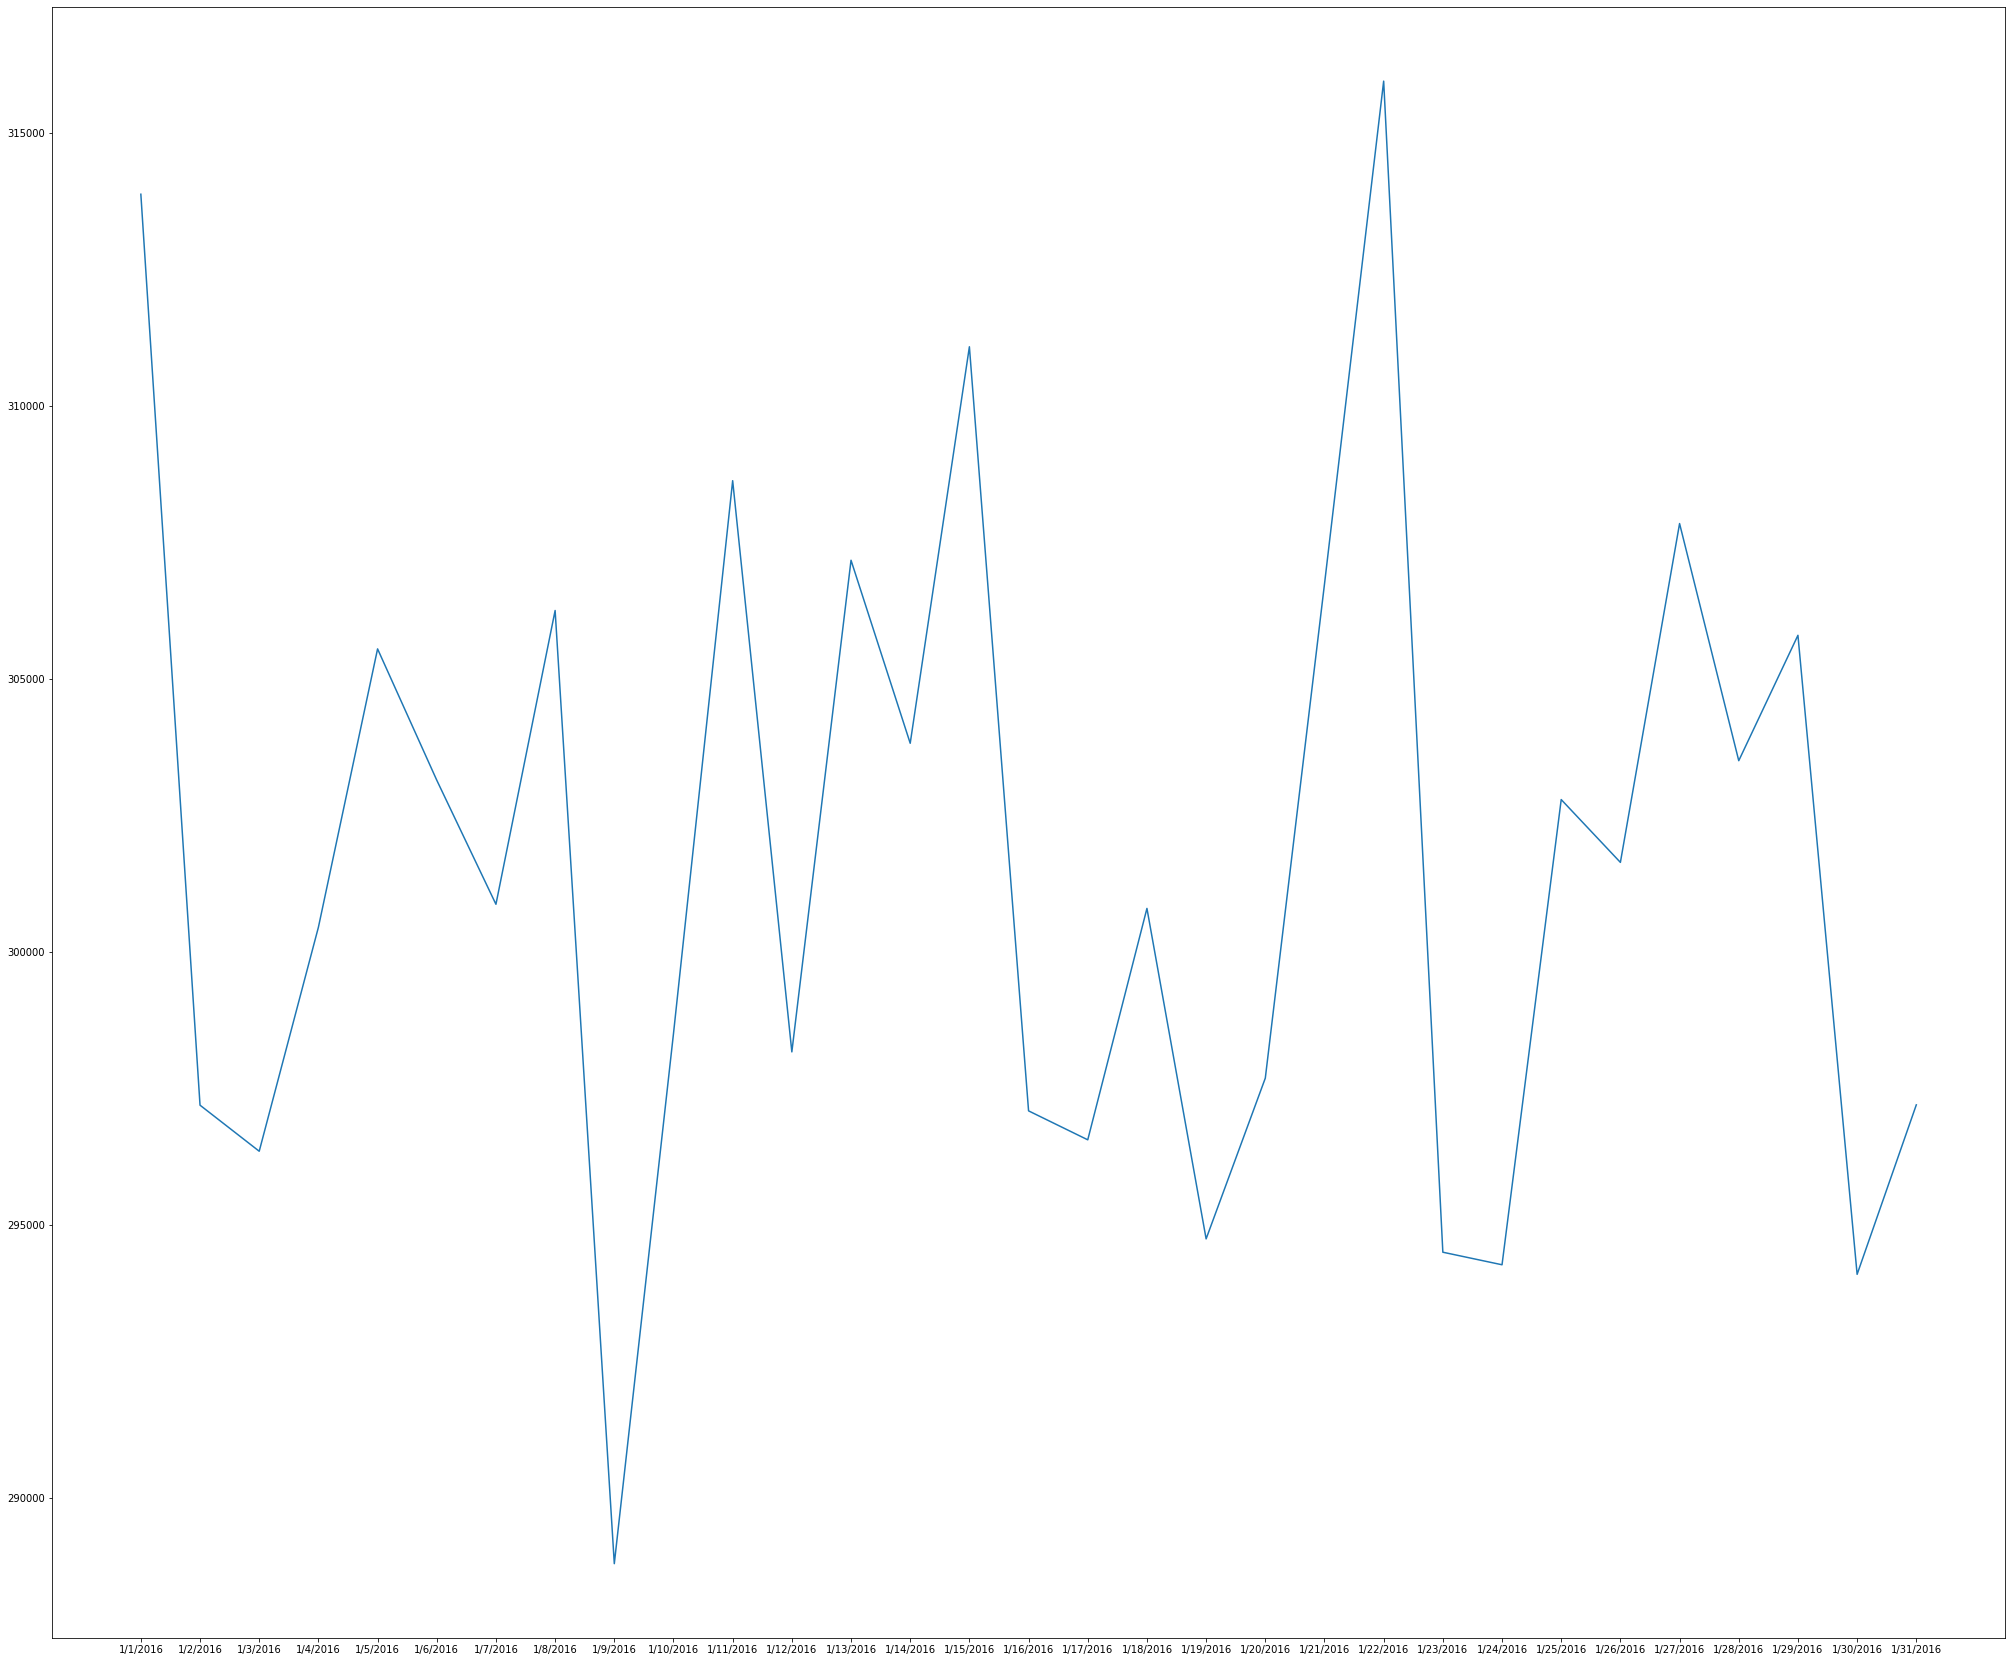

In [100]:
plt.figure(figsize=(35, 30))
df = copy.deepcopy(dfday)
dfday["NE-Total"] = dfday["HM-NE"] + dfday["CF-NE"] + dfday["FF-NE"]
dfday["SW-Total"] = dfday["HM-SW"] + dfday["CF-SW"] + dfday["FF-SW"]
dfday["NW-Total"] = dfday["HM-NW"] + dfday["CF-NW"] + dfday["FF-NW"]
dfday["SE-Total"] = dfday["HM-SE"] + dfday["CF-SE"] + dfday["FF-SE"]
dfday["C-Total"] = dfday["HM-C"] + dfday["CF-C"] + dfday["FF-C"]
plt.figure(figsize=(35, 30))
dfday["Total-Sales"] = dfday["NE-Total"] + dfday["SW-Total"] + dfday["NW-Total"] + dfday["SE-Total"] + dfday["C-Total"]

dfday["HM-Total"] = dfday["HM-NE"] + dfday["HM-SW"] + dfday["HM-NW"] + dfday["HM-SE"] + dfday["HM-C"]
dfday["CF-Total"] = dfday["CF-NE"] + dfday["CF-SW"] + dfday["CF-NW"] + dfday["CF-SE"] + dfday["CF-C"]
dfday["FF-Total"] = dfday["FF-NE"] + dfday["FF-SW"] + dfday["FF-NW"] + dfday["FF-SE"] + dfday["FF-C"]

plt.plot(dfday["Day"], dfday['Total-Sales'])
plt.show()

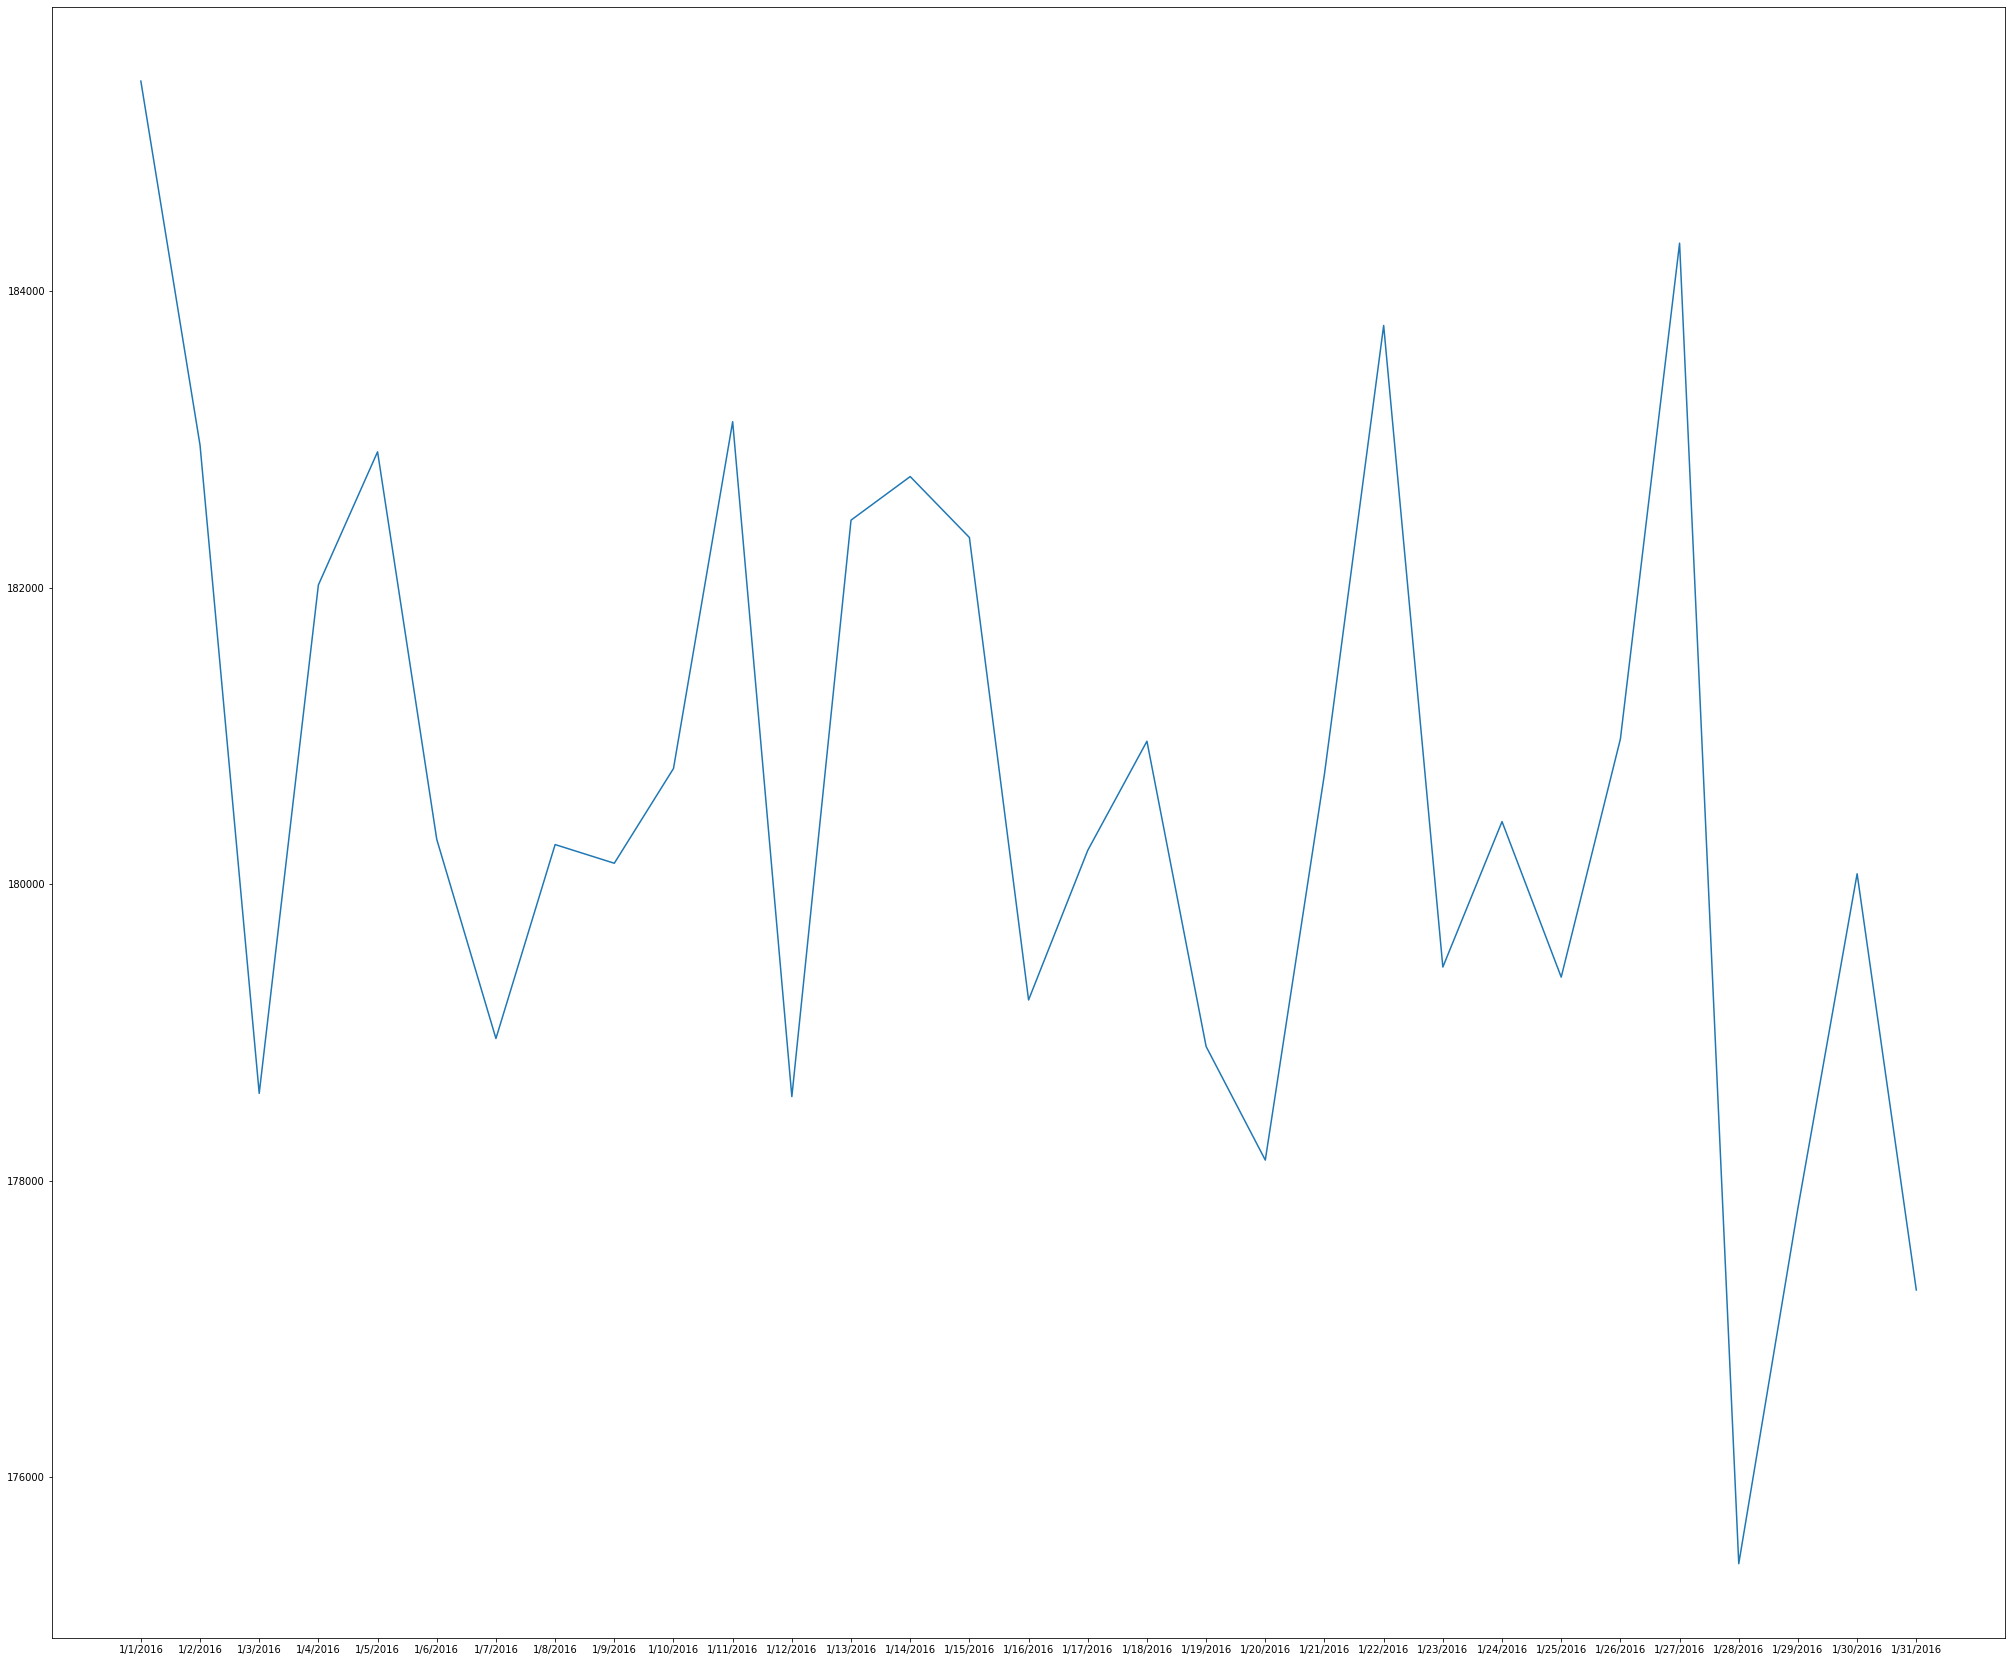

In [101]:
plt.figure(figsize=(35, 30))
plt.plot(dfday["Day"], dfday['HM-Total'])
plt.show()

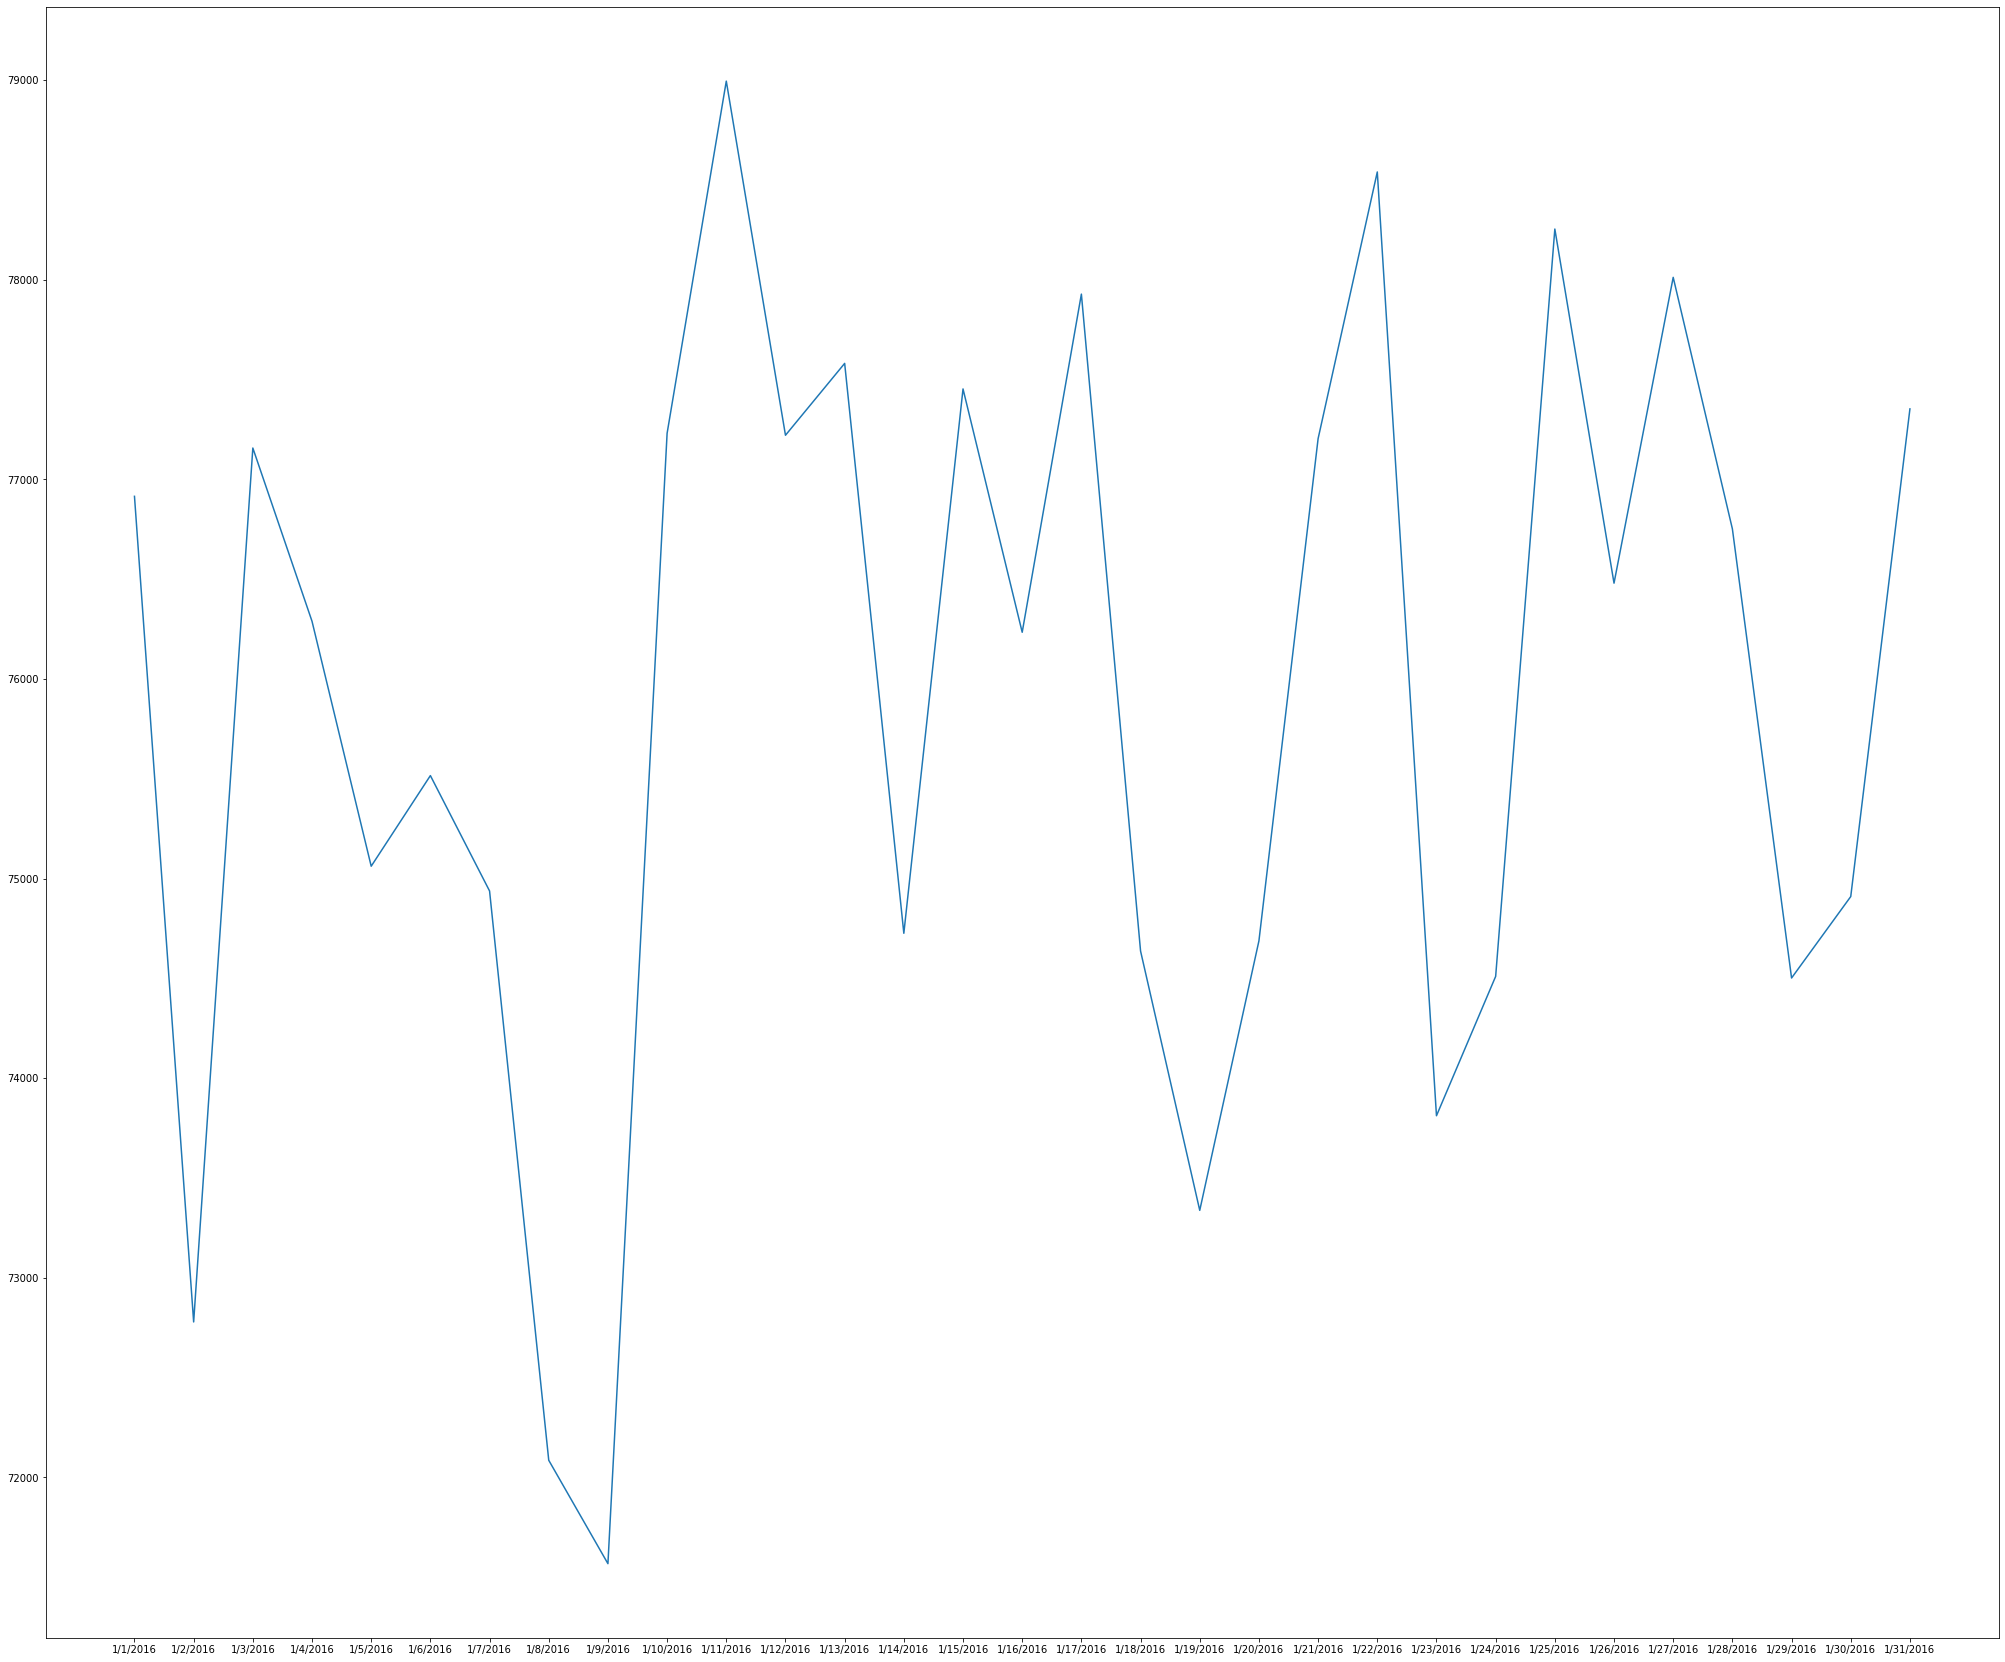

In [102]:
plt.figure(figsize=(35, 30))
plt.plot(dfday["Day"], dfday['CF-Total'])
plt.show()

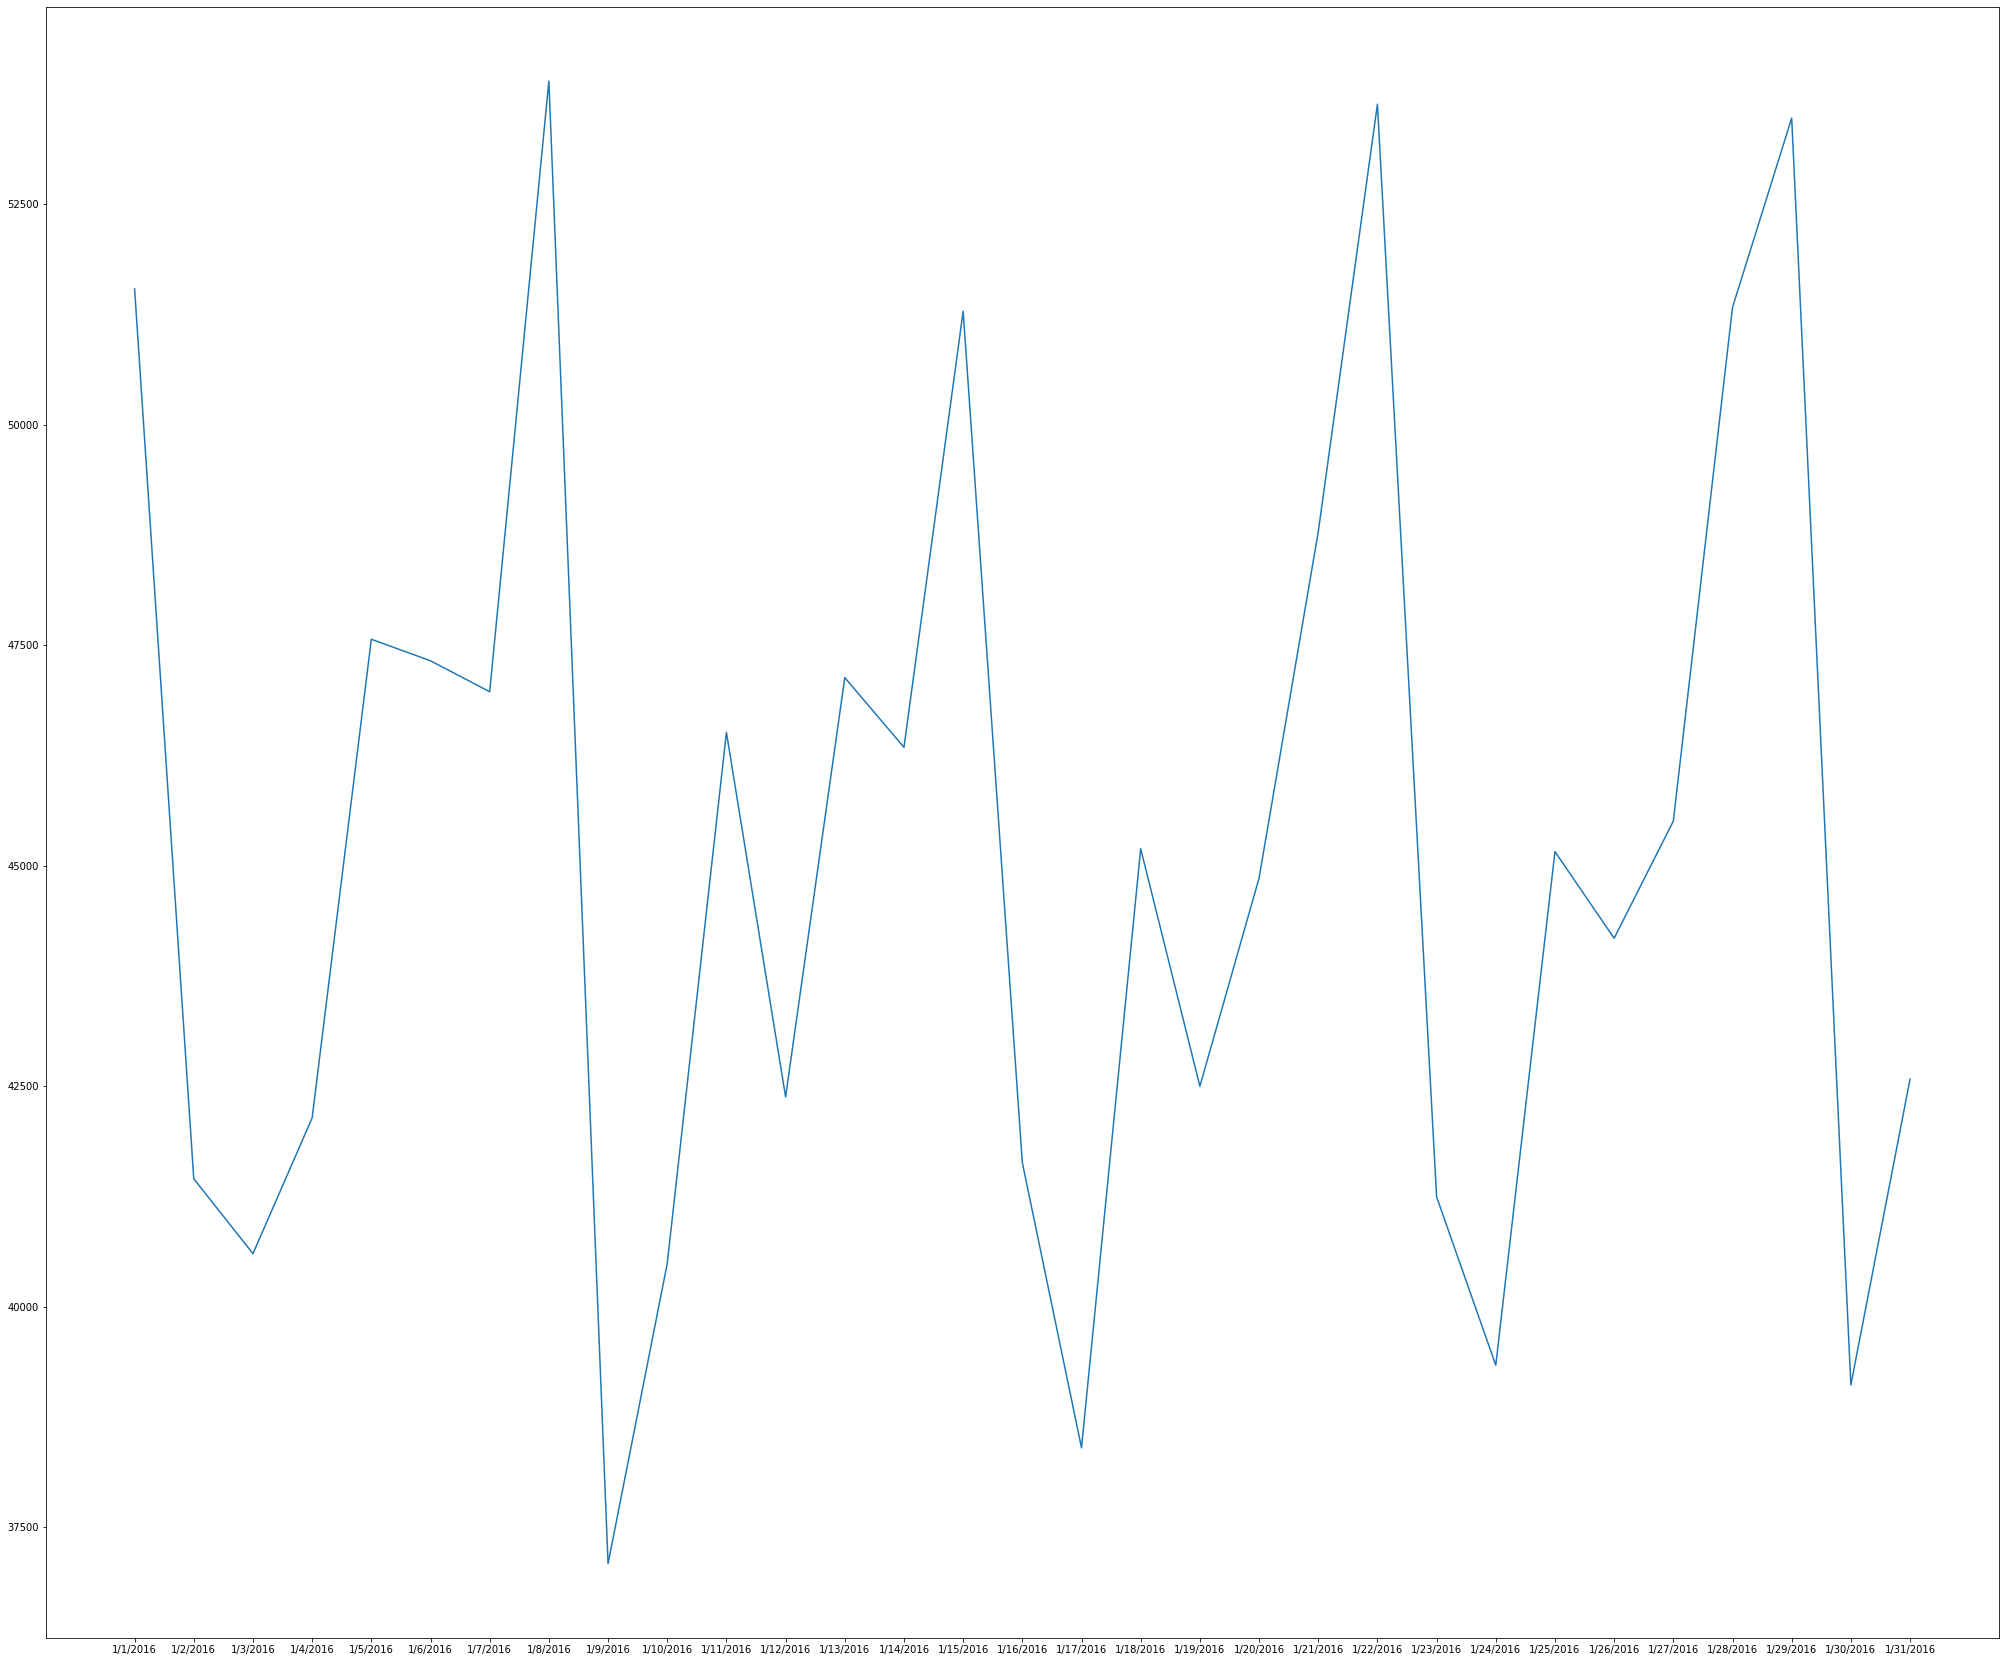

In [103]:
plt.figure(figsize=(35, 30))
plt.plot(dfday["Day"], dfday['FF-Total'])
plt.show()

In [104]:
df['Day-of-week'].value_counts().plot(kind='bar')

KeyError: 'Day-of-week'

In [105]:

days = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

df.rename(columns={"Unnamed: 0": "Day-of-week"}, inplace=True)
df = df.drop(columns=['Day'])
df['Day-of-week'] = df['Day-of-week'].astype('category', categories=days, ordered=True)

df["NE-Avg"] = df["HM-NE"] + df["CF-NE"] + df["FF-NE"]
df["SW-Avg"] = df["HM-SW"] + df["CF-SW"] + df["FF-SW"]
df["NW-Avg"] = df["HM-NW"] + df["CF-NW"] + df["FF-NW"]
df["SE-Avg"] = df["HM-SE"] + df["CF-SE"] + df["FF-SE"]
df["C-Avg"] = df["HM-C"] + df["CF-C"] + df["FF-C"]
df["Total-Avg"] = df["NE-Avg"] + df["SW-Avg"] + df["NW-Avg"] + df["SE-Avg"] + df["C-Avg"]

df["HM-Avg"] = df["HM-NE"] + df["HM-SW"] + df["HM-NW"] + df["HM-SE"] + df["HM-C"]
df["CF-Avg"] = df["CF-NE"] + df["CF-SW"] + df["CF-NW"] + df["CF-SE"] + df["CF-C"]
df["FF-Avg"] = df["FF-NE"] + df["FF-SW"] + df["FF-NW"] + df["FF-SE"] + df["FF-C"]

x = df.groupby(["Day-of-week"]).mean()
x = x.reset_index()
x

,Day-of-week,HM-NE,CF-NE,FF-NE,HM-SW,CF-SW,FF-SW,HM-NW,CF-NW,FF-NW,...,FF-Total,NE-Avg,SW-Avg,NW-Avg,SE-Avg,C-Avg,Total-Avg,HM-Avg,CF-Avg,FF-Avg
0,Monday,36851.75,16411.00,9284.25,34916.0,16115.00,9241.25,37262.75,15342.5,8649.75,...,44751.50,62547.00,60272.25,61255.00,58164.50,60925.00,303163.75,181368.50,77043.75,44751.50
1,Tuesday,37134.25,16027.75,9576.50,35669.0,14758.75,8891.50,36158.50,15496.5,8787.75,...,44156.25,62738.50,59319.25,60442.75,58320.50,59202.25,300023.25,180341.75,75525.25,44156.25
2,Wednesday,36671.75,16443.75,9513.75,36445.0,15202.00,9503.50,36393.75,15431.0,9328.75,...,46205.50,62629.25,61150.50,61153.50,59346.75,59679.50,303959.50,181304.75,76449.25,46205.50
3,Thursday,36636.00,16469.50,11797.50,35963.5,14483.00,9390.75,35413.00,16250.5,9273.75,...,48357.50,64903.00,59837.25,60937.25,58514.00,59538.25,303729.75,179467.25,75905.00,48357.50
4,Friday,36478.20,15701.60,7634.20,37828.4,15783.60,10821.00,36121.60,15422.8,10405.60,...,52766.80,59814.00,64433.00,61950.00,61971.40,62418.60,310587.00,181921.00,75899.20,52766.80
5,Saturday,36361.20,14994.20,7400.20,35949.2,14175.00,7992.80,35332.20,15176.4,8536.60,...,40106.40,58755.60,58117.00,59045.20,58740.60,59675.00,294333.40,180366.40,73860.60,40106.40
6,Sunday,37516.60,15983.00,9875.60,36740.6,15308.00,7792.80,34687.40,15800.2,7806.60,...,40282.20,63375.20,59841.40,58294.20,56822.60,58241.00,296574.40,179456.40,76835.80,40282.20


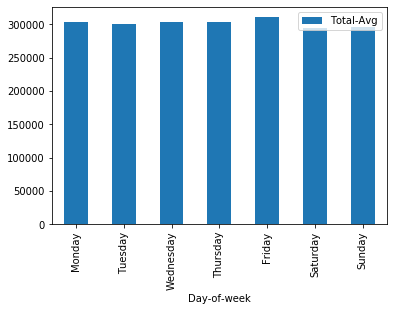

In [106]:
x.plot(kind='bar',x='Day-of-week',y='Total-Avg')

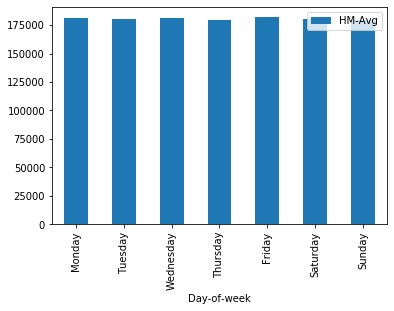

In [107]:
x.plot(kind='bar',x='Day-of-week',y='HM-Avg')

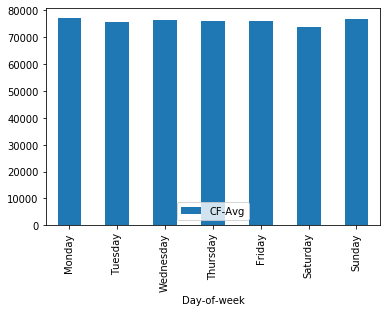

In [108]:
x.plot(kind='bar',x='Day-of-week',y='CF-Avg')

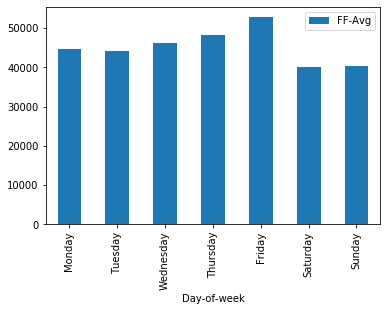

In [109]:
x.plot(kind='bar',x='Day-of-week',y='FF-Avg')

In [110]:
dfmonth.head()

,"Month, Year",HM-NE,CF-NE,FF-NE,HM-SW,CF-SW,FF-SW,HM-NW,CF-NW,FF-NW,HM-SE,CF-SE,FF-SE,HM-C,CF-C,FF-C
0,Jan-16,1140955,494802,285238,1124565,468568,281141,1111618,482079,277904,1095034,456264,273758,1126476,450958,281619
1,Feb-16,1175529,489804,293882,1200559,480616,288369,1188037,475603,297009,1167009,486254,280311,1109076,462115,288586
2,Mar-16,1235995,494802,296881,1220454,508522,293148,1151657,499443,287914,1133899,472458,295045,1167894,486622,280523
3,Apr-16,1186592,514593,296648,1213616,485843,291505,1149180,498369,299021,1133767,491684,283441,1116560,465233,290533
4,May-16,1272450,530187,305637,1249686,520702,312421,1187579,494824,296894,1215080,506283,291857,1155612,481505,300695


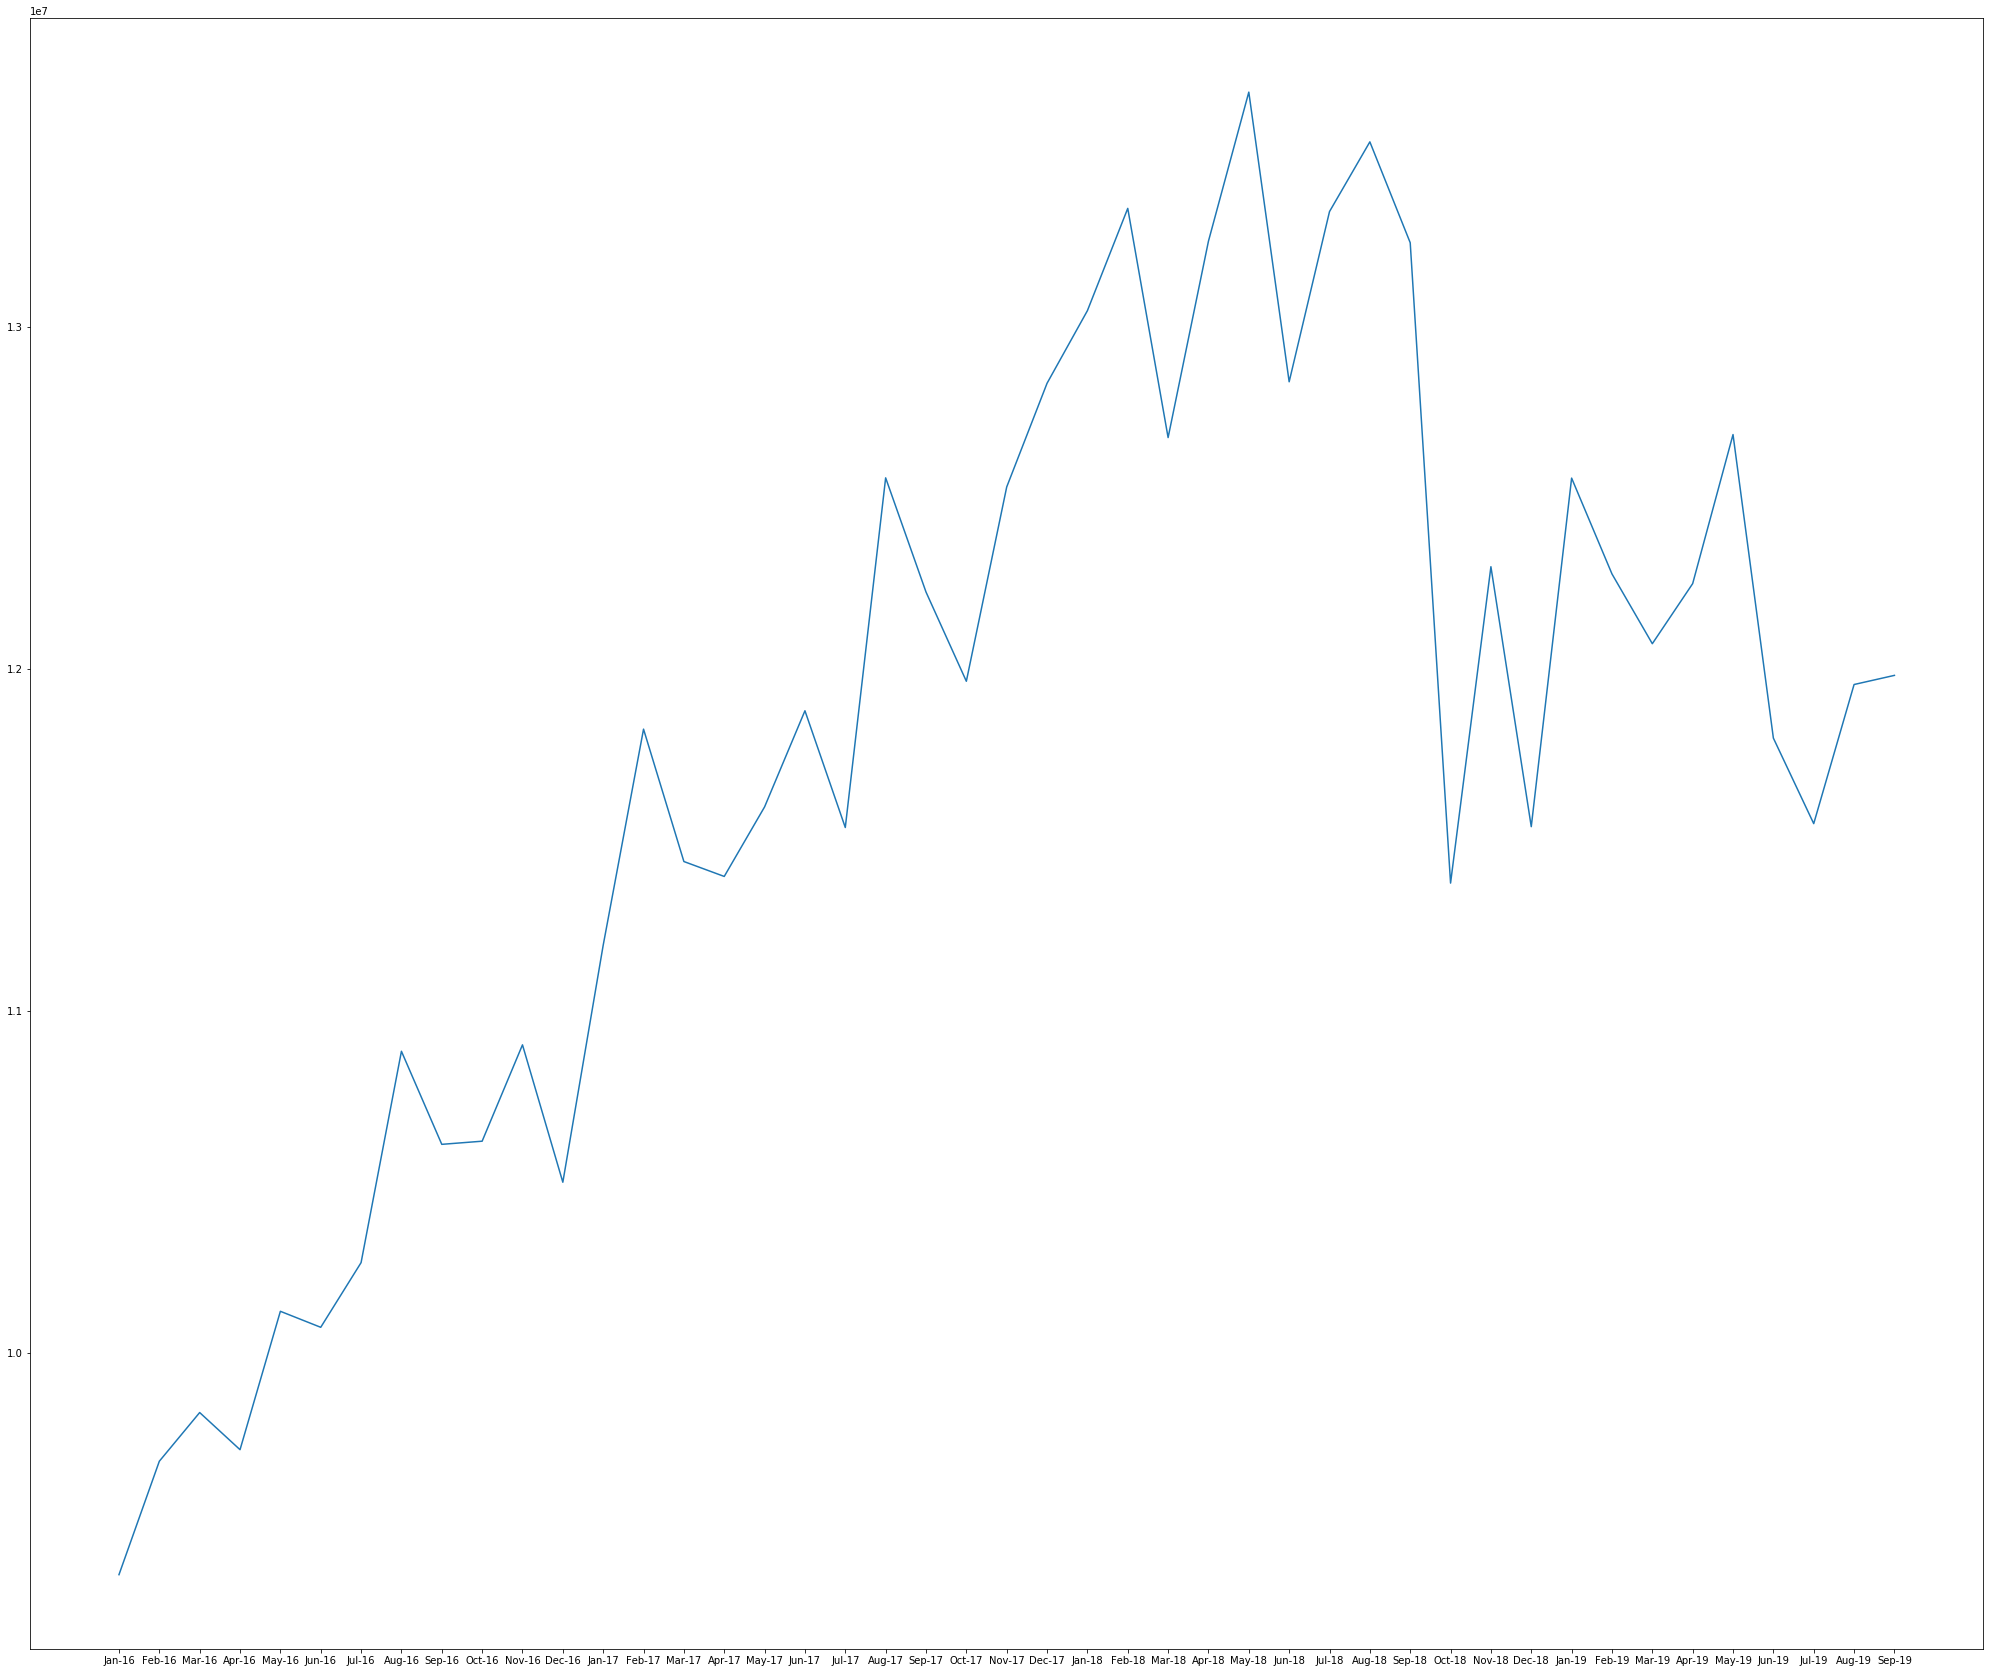

In [111]:
df2 = copy.deepcopy(dfmonth)
df2["NE-Total"] = df2["HM-NE"] + df2["CF-NE"] + df2["FF-NE"]
df2["SW-Total"] = df2["HM-SW"] + df2["CF-SW"] + df2["FF-SW"]
df2["NW-Total"] = df2["HM-NW"] + df2["CF-NW"] + df2["FF-NW"]
df2["SE-Total"] = df2["HM-SE"] + df2["CF-SE"] + df2["FF-SE"]
df2["C-Total"] = df2["HM-C"] + df2["CF-C"] + df2["FF-C"]
plt.figure(figsize=(35, 30))
df2["Total-Sales"] = df2["NE-Total"] + df2["SW-Total"] + df2["NW-Total"] + df2["SE-Total"] + df2["C-Total"]

plt.plot(df2["Month, Year"], df2["Total-Sales"])
plt.show()

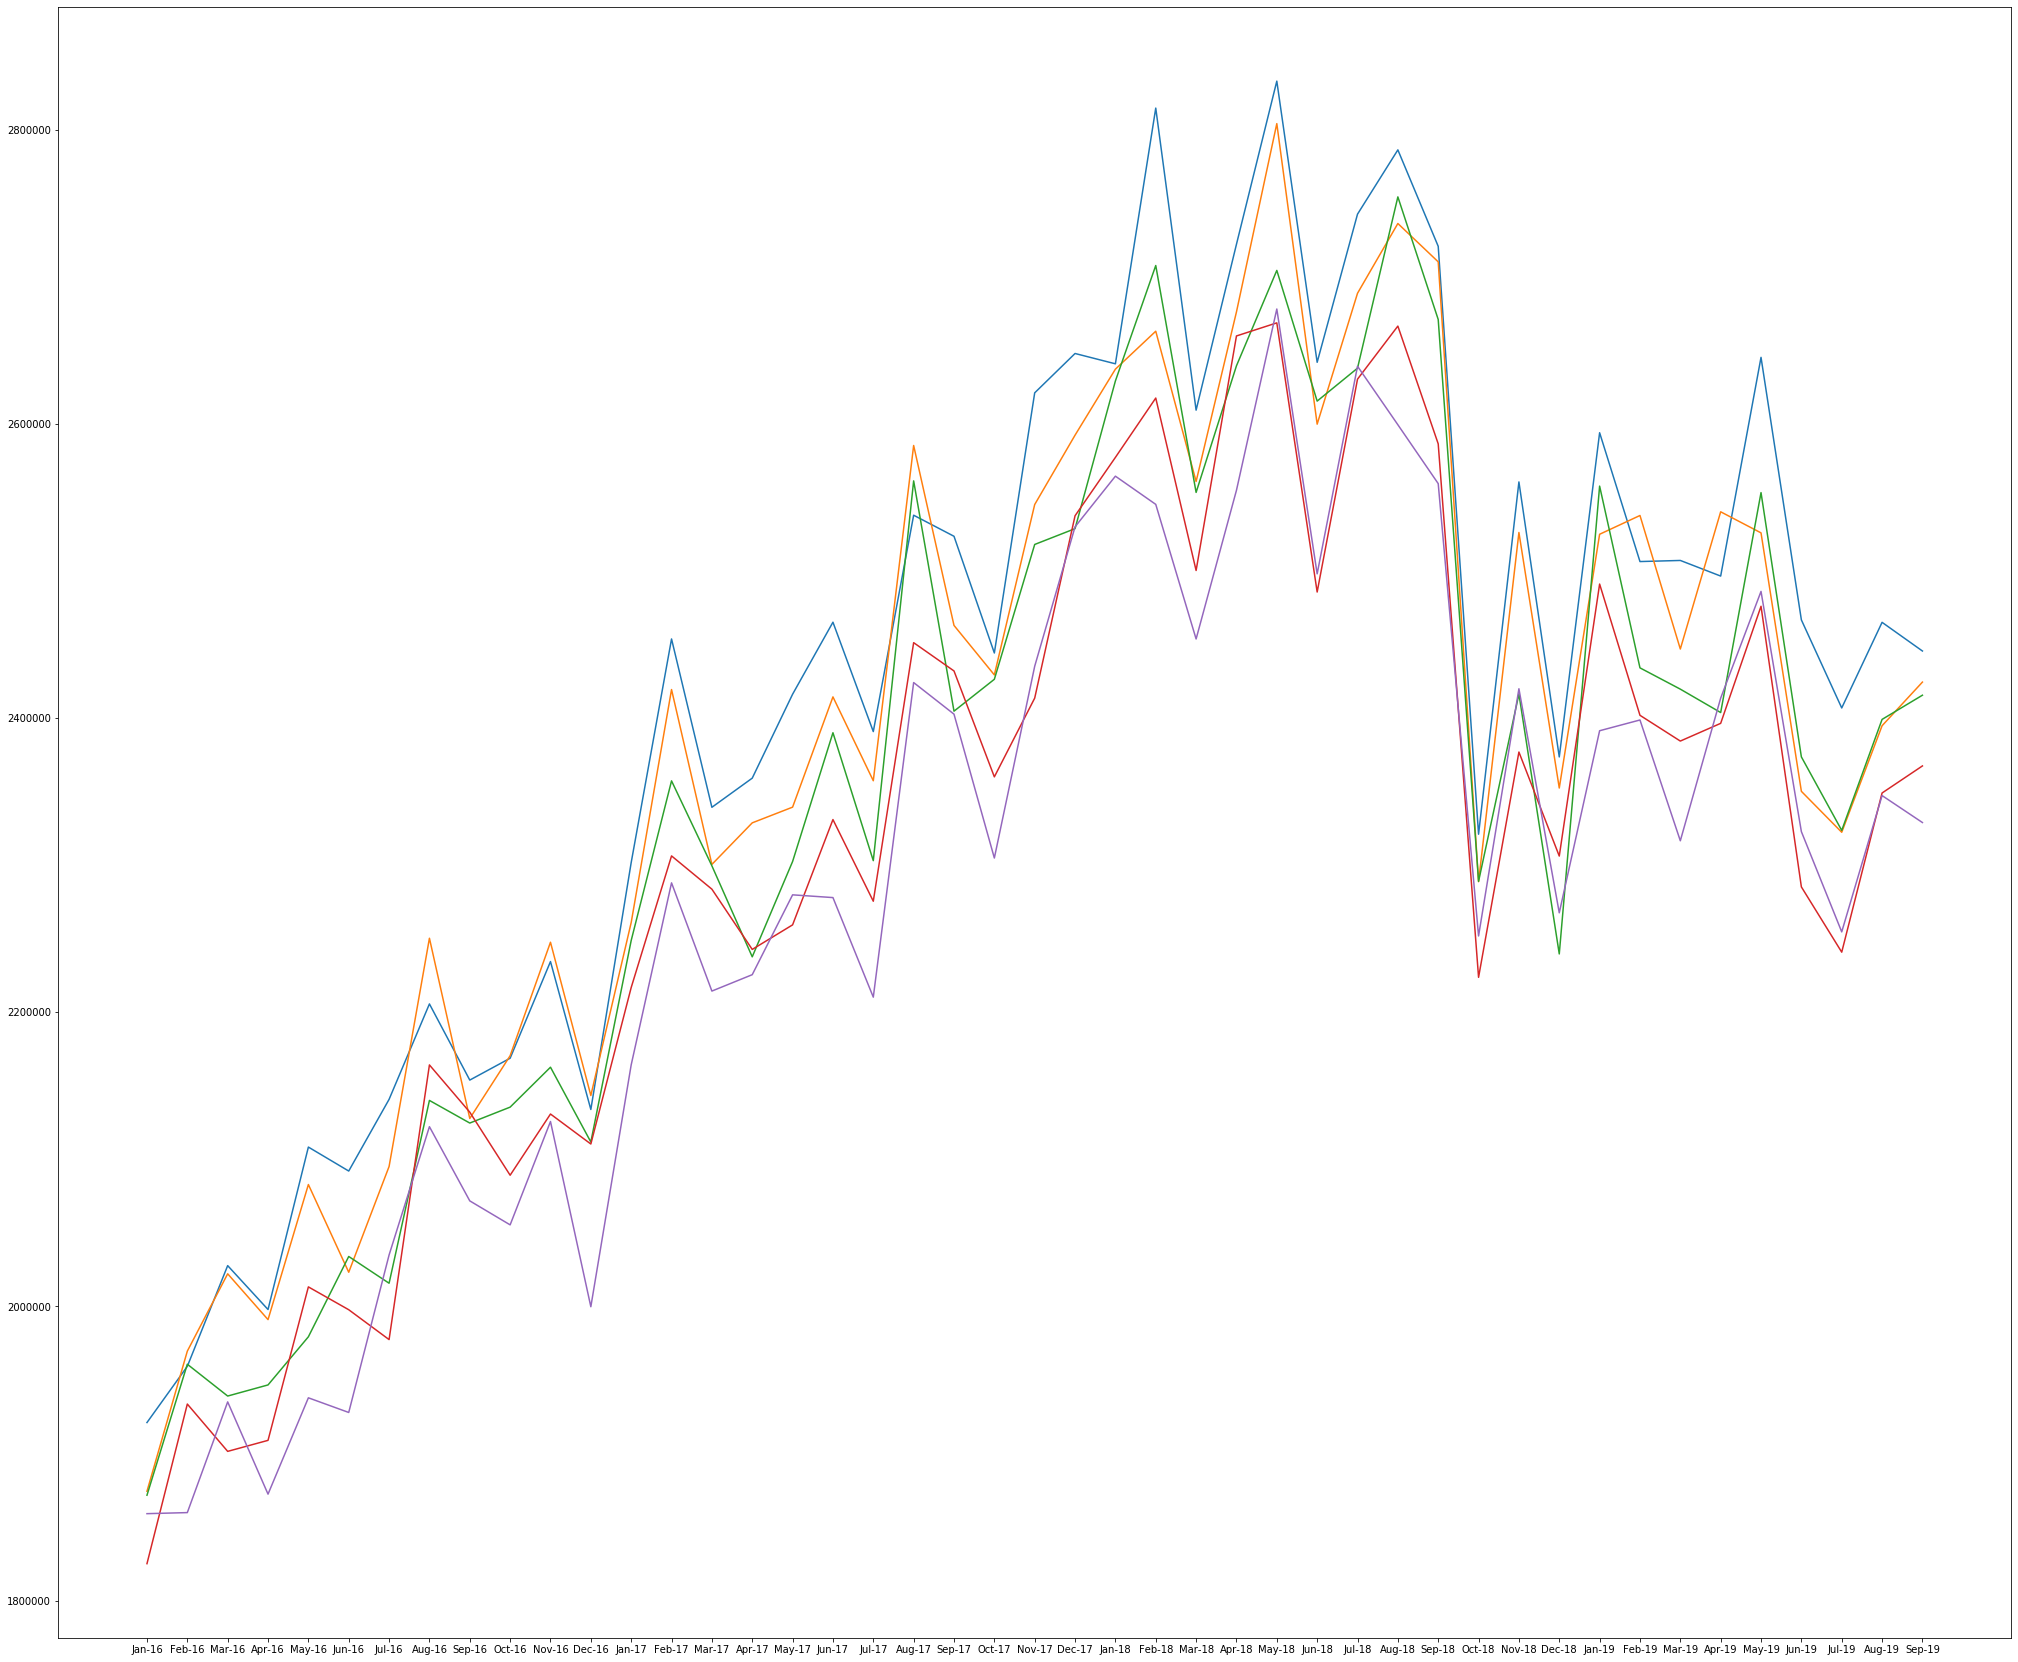

In [112]:
plt.figure(figsize=(35, 30))
plt.plot(df2["Month, Year"], df2["NE-Total"])
plt.plot(df2["Month, Year"], df2["SW-Total"])
plt.plot(df2["Month, Year"], df2["NW-Total"])
plt.plot(df2["Month, Year"], df2["SE-Total"])
plt.plot(df2["Month, Year"], df2["C-Total"])
plt.show()


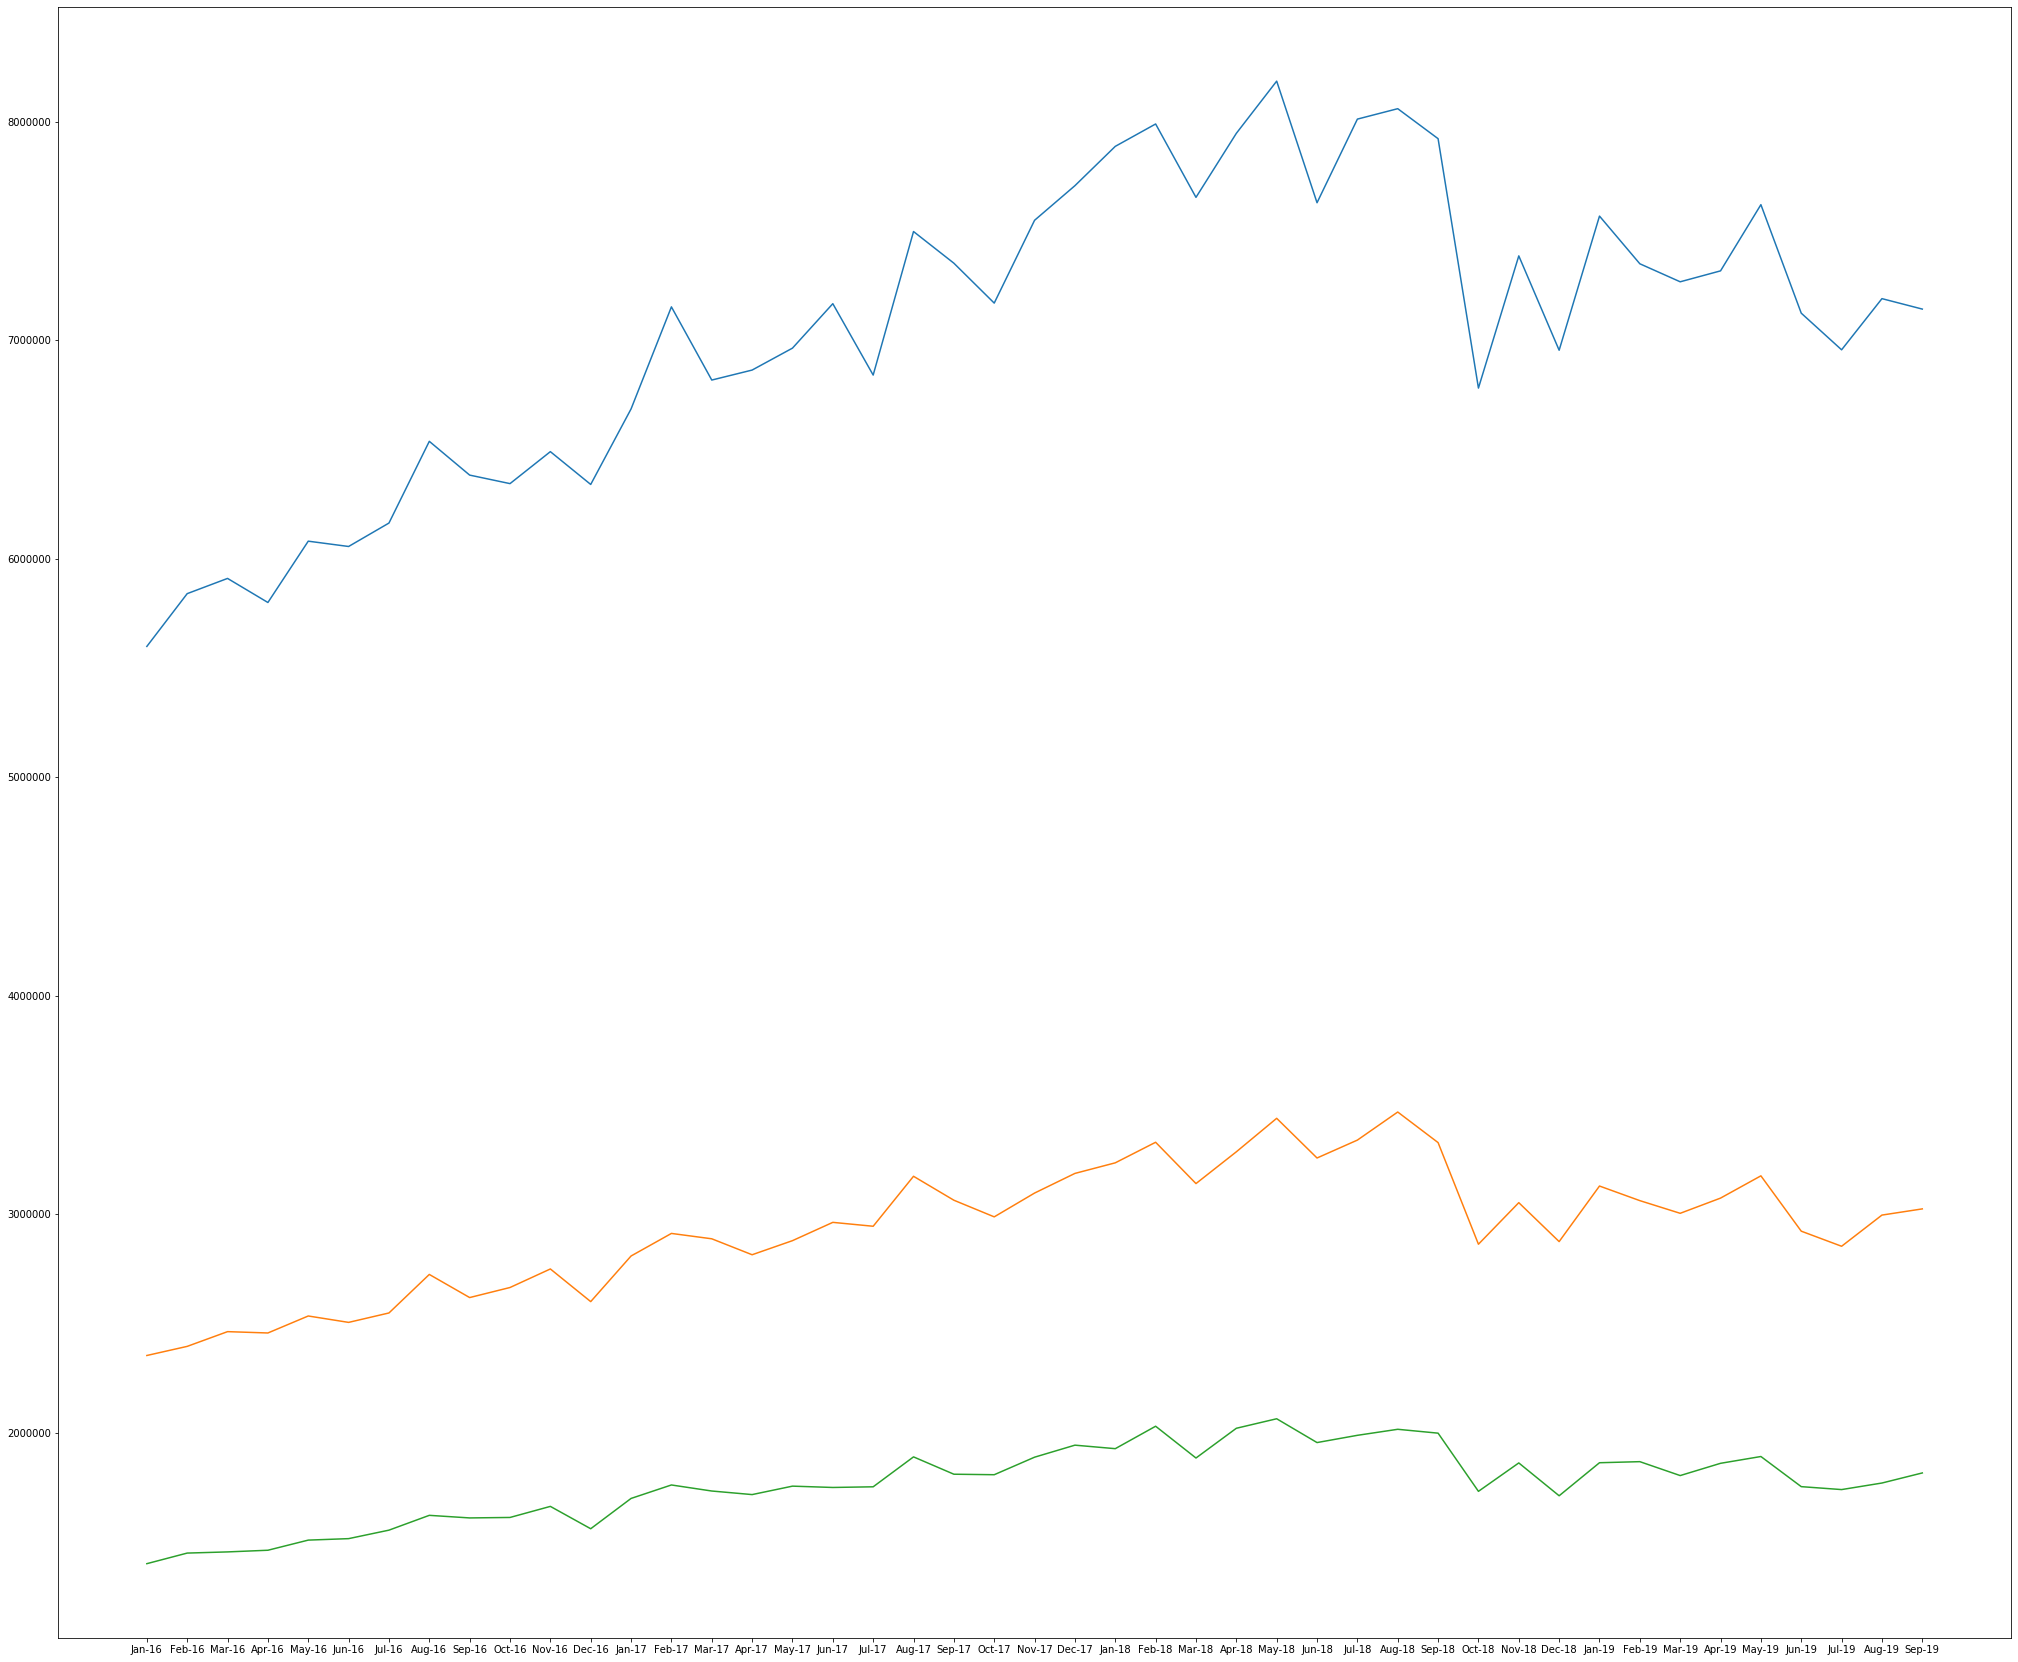

In [113]:
plt.figure(figsize=(35, 30))
df2["HM-Total"] = df2["HM-NE"] + df2["HM-SW"] + df2["HM-NW"] + df2["HM-SE"] + df2["HM-C"]
df2["CF-Total"] = df2["CF-NE"] + df2["CF-SW"] + df2["CF-NW"] + df2["CF-SE"] + df2["CF-C"]
df2["FF-Total"] = df2["FF-NE"] + df2["FF-SW"] + df2["FF-NW"] + df2["FF-SE"] + df2["FF-C"]
plt.plot(df2["Month, Year"], df2["HM-Total"])
plt.plot(df2["Month, Year"], df2["CF-Total"])
plt.plot(df2["Month, Year"], df2["FF-Total"])
plt.show()


In [115]:
df2.to_csv("monthly_sales_updated.csv")
x.to_csv("daily_sales_grouped_avg.csv")
df.to_csv("daily_sales_total.csv")